In [71]:
#Data Preparation

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "heart_disease.xlsx"
df = pd.read_excel(file_path, sheet_name="Heart_disease")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [73]:
df.shape

(908, 13)

In [74]:
 df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [76]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [10]:
#EDA

In [30]:
import seaborn as sns
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   trestbps  908 non-null    int64  
 2   chol      908 non-null    int64  
 3   thalch    908 non-null    int64  
 4   exang     853 non-null    float64
 5   oldpeak   846 non-null    float64
 6   num       908 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 49.8 KB
None 

   age  trestbps  chol  thalch  exang  oldpeak  num
0   63       145   233     150    0.0      2.3    0
1   41       135   203     132    0.0      0.0    0
2   57       140   192     148    0.0      0.4    0
3   52       118   186     190    0.0      0.0    0
4   57       110   201     126    1.0      1.5    0


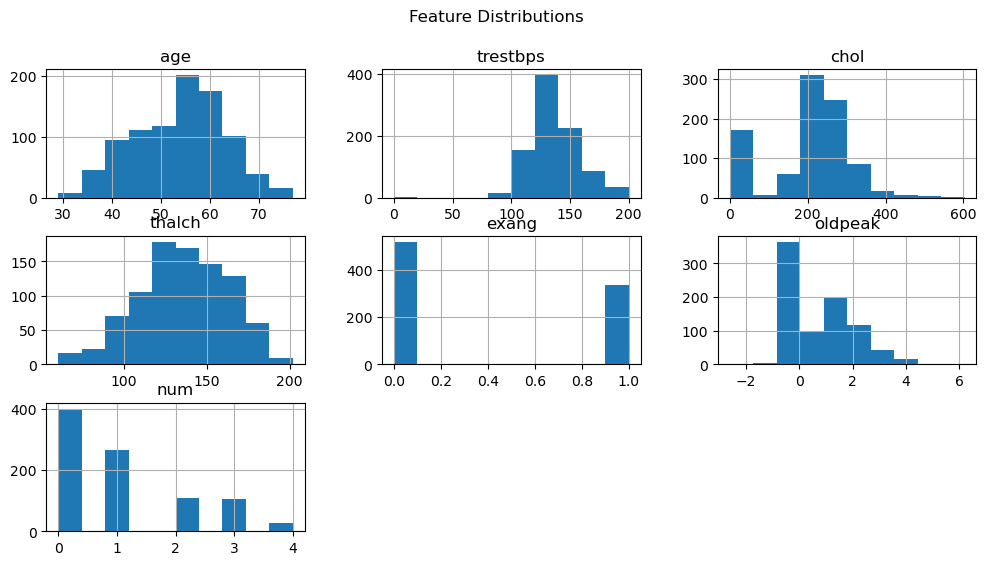

In [32]:
df.dropna(how="all", inplace=True)
df.dropna(axis=1, how="all", inplace=True)
df.columns = df.columns.str.strip()
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.select_dtypes(include=[np.number])
df.dropna(how="all", inplace=True)
print("Cleaned Dataset Info:")
print(df.info(), "\n")
print(df.head())
if df.shape[1] > 0:
    df.hist(bins=10, figsize=(12, 6))
    plt.suptitle("Feature Distributions")
    plt.show()
else:
    print("⚠️ No numeric columns found even after conversion. Please check your Excel file content.")


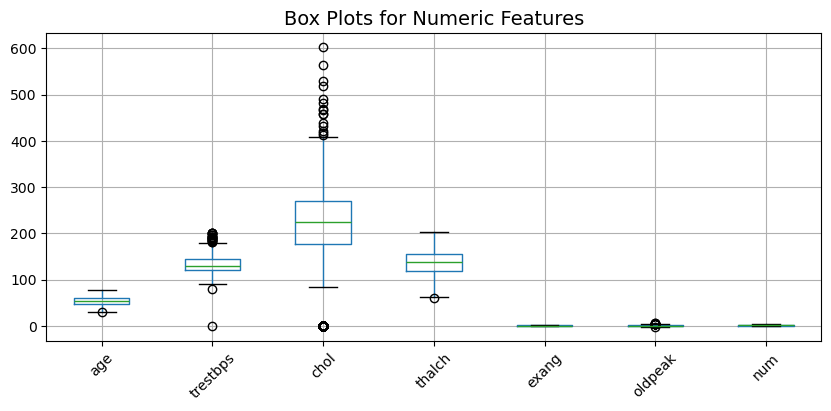

In [35]:
plt.figure(figsize=(10, 4))
df.boxplot()
plt.title("Box Plots for Numeric Features", fontsize=14)
plt.xticks(rotation=45)
plt.show()


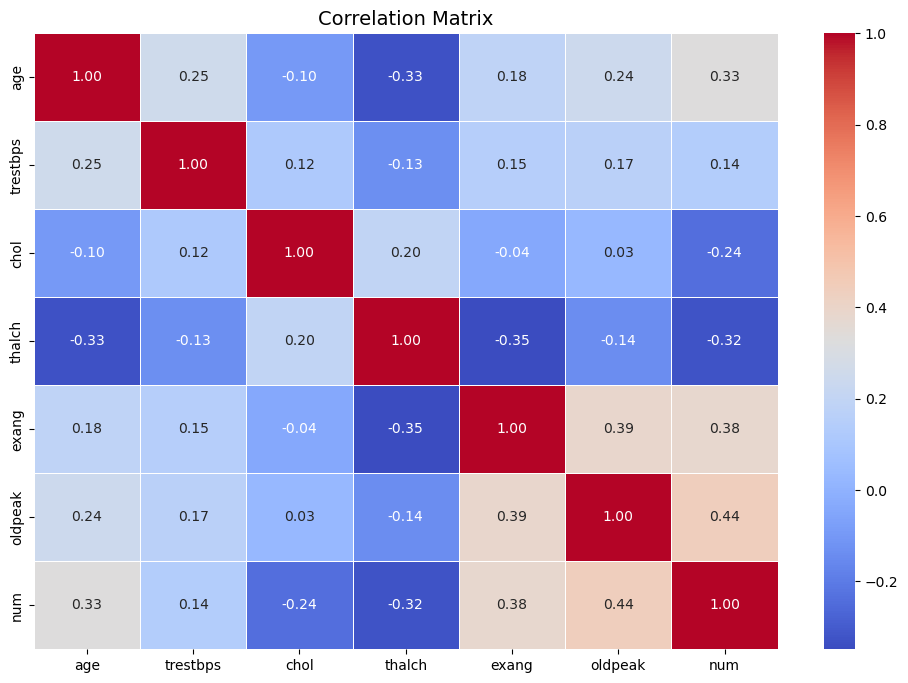

In [37]:
import seaborn as sns
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

In [38]:
#Feature Engineering

In [40]:
from sklearn.preprocessing import StandardScaler
df.fillna(df.mean(), inplace=True)
if 'num' in df.columns:
    X = df.drop('num', axis=1)
    y = df['num']
else:
    print("⚠️ 'num' (target) column not found — please check your column names.")
    X = df.copy()
    y = None
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("✅ Feature Engineering completed successfully.")
print("Scaled feature sample:")
print(X_scaled.head())


✅ Feature Engineering completed successfully.
Scaled feature sample:
        age  trestbps      chol    thalch     exang   oldpeak
0  1.006027  0.567394  0.281297  0.524183 -0.833794  1.334996
1 -1.397560  0.076967  0.013526 -0.147705 -0.833794 -0.844594
2  0.350503  0.322181 -0.084656  0.449529 -0.833794 -0.465535
3 -0.195767 -0.756760 -0.138211  2.017268 -0.833794 -0.844594
4  0.350503 -1.149102 -0.004325 -0.371668  1.276669  0.576878


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    print("✅ Train-test split completed successfully.")
    print("Training samples:", X_train.shape[0])
    print("Testing samples:", X_test.shape[0])
else:
    raise ValueError("⚠️ Target variable y not defined. Please check if 'num' column exists.")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print("\n--- Decision Tree Model Evaluation ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, average='weighted'):.4f}")
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

✅ Train-test split completed successfully.
Training samples: 726
Testing samples: 182

--- Decision Tree Model Evaluation ---
Accuracy:  0.4341
Precision: 0.4704
Recall:    0.4341
F1 Score:  0.4473

Confusion Matrix:
[[49 17  6  8  0]
 [11 24  7  9  2]
 [ 4 13  1  4  0]
 [ 0 10  6  4  1]
 [ 1  1  2  1  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.61      0.68        80
           1       0.37      0.45      0.41        53
           2       0.05      0.05      0.05        22
           3       0.15      0.19      0.17        21
           4       0.25      0.17      0.20         6

    accuracy                           0.43       182
   macro avg       0.31      0.29      0.30       182
weighted avg       0.47      0.43      0.45       182



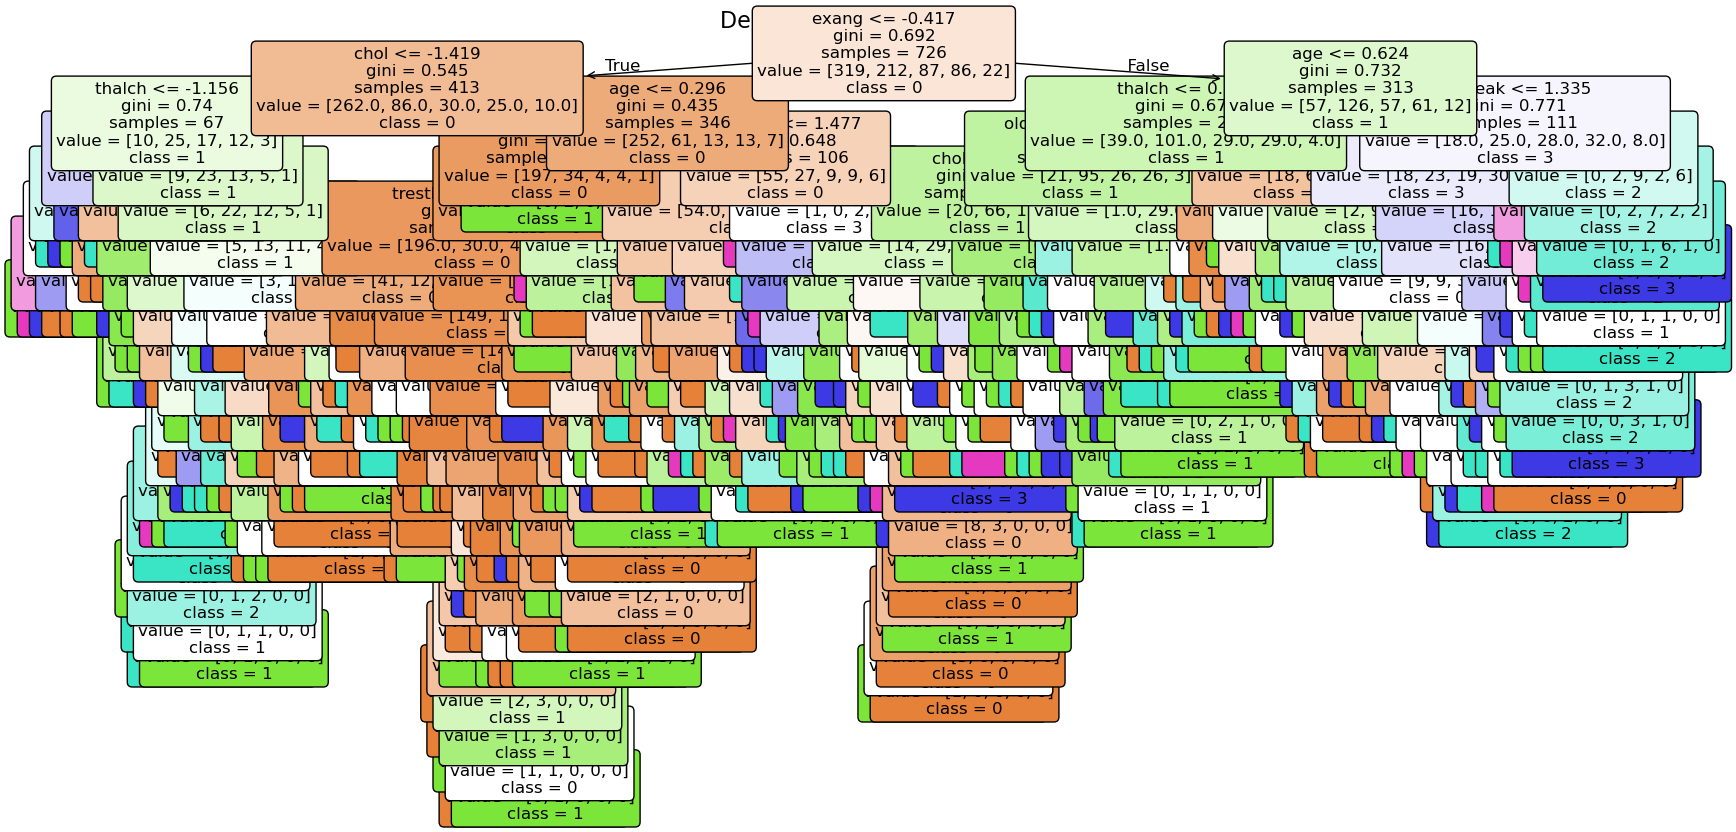


Feature Importances:


,Feature,Importance
2,chol,0.245738
3,thalch,0.207453
1,trestbps,0.170978
0,age,0.156064
5,oldpeak,0.115528
4,exang,0.104239


In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X_scaled.columns,
    class_names=[str(cls) for cls in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()
feature_importance = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
display(feature_importance)

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # optimize for accuracy
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

print("✅ Best Parameters Found:")
print(best_params)
y_best_pred = best_dt_model.predict(X_test)

✅ Best Parameters Found:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 20}


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n--- Optimized Decision Tree Performance ---")
print(f"Accuracy:  {accuracy_score(y_test, y_best_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_best_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_best_pred, average='weighted', zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_best_pred, average='weighted', zero_division=0):.4f}")


--- Optimized Decision Tree Performance ---
Accuracy:  0.5110
Precision: 0.4566
Recall:    0.5110
F1 Score:  0.4815


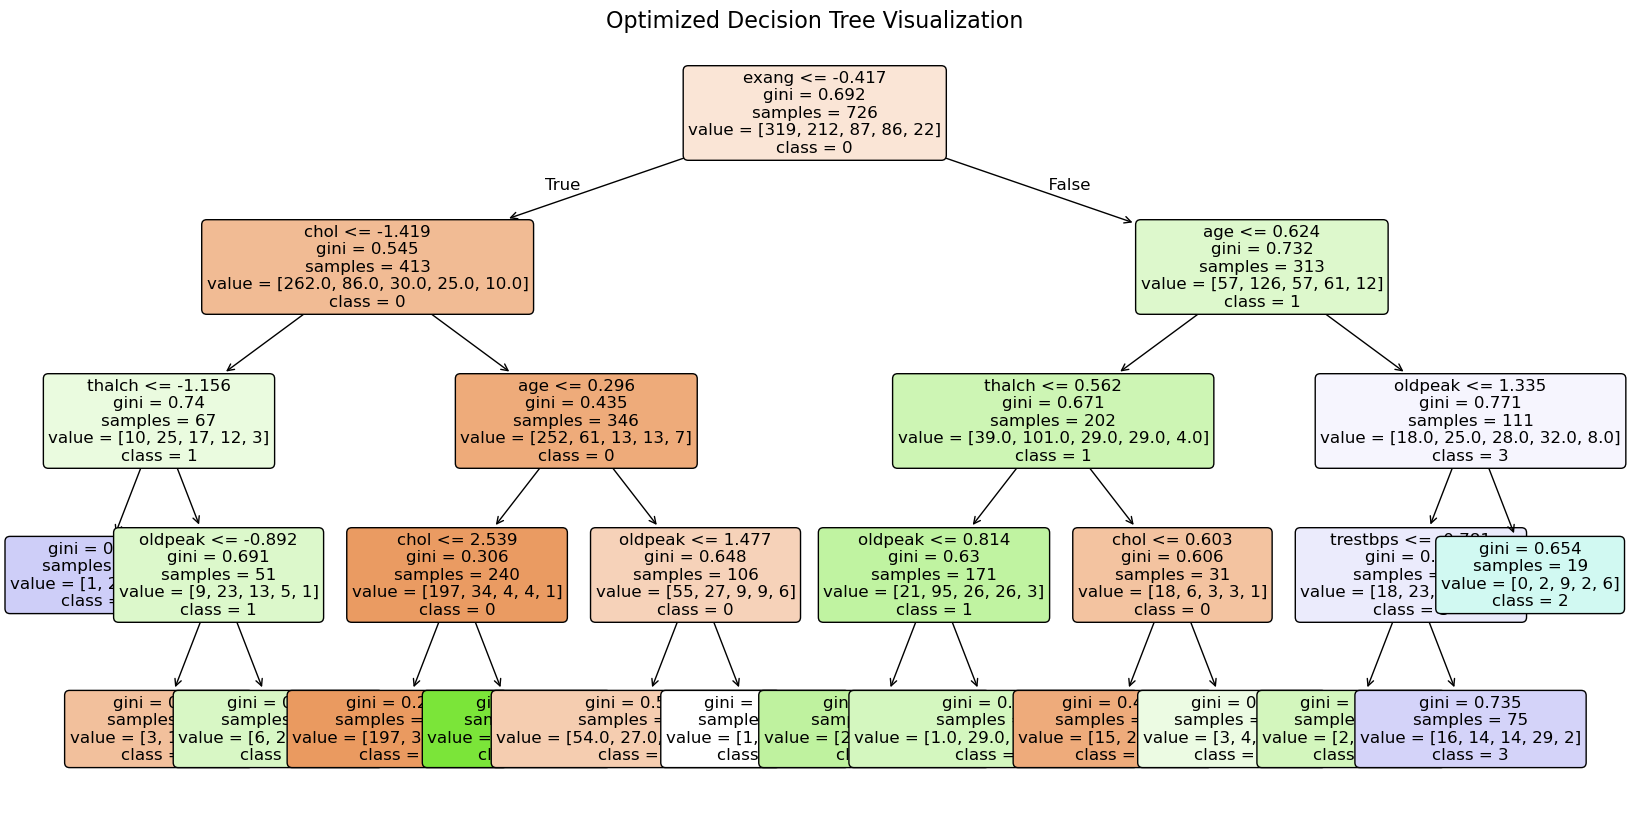


--- Feature Importances ---


,Feature,Importance
4,exang,0.392086
2,chol,0.240593
0,age,0.133717
5,oldpeak,0.108277
3,thalch,0.097740
1,trestbps,0.027586


In [55]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(
    best_dt_model,
    feature_names=X_scaled.columns,
    class_names=[str(cls) for cls in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Optimized Decision Tree Visualization", fontsize=16)
plt.show()
feature_importance = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Feature Importances ---")
display(feature_importance)


In [50]:
if len(y.unique()) == 2:
    y_prob = best_dt_model.predict_proba(X_test)[:, 1]  # probability of positive class
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC  : {roc_auc:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0,1], [0,1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Decision Tree')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("⚠️ ROC-AUC is only computed for binary classification.")

⚠️ ROC-AUC is only computed for binary classification.


In [51]:
#Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,               
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

print("✅ Best Hyperparameters Found:")
print(best_params)
y_best_pred = best_dt_model.predict(X_test)

print("\n--- Optimized Decision Tree Performance ---")
print(f"Accuracy : {accuracy_score(y_test, y_best_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_best_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall   : {recall_score(y_test, y_best_pred, average='weighted', zero_division=0):.4f}")
print(f"F1-score : {f1_score(y_test, y_best_pred, average='weighted', zero_division=0):.4f}")


✅ Best Hyperparameters Found:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 20}

--- Optimized Decision Tree Performance ---
Accuracy : 0.5110
Precision: 0.4566
Recall   : 0.5110
F1-score : 0.4815


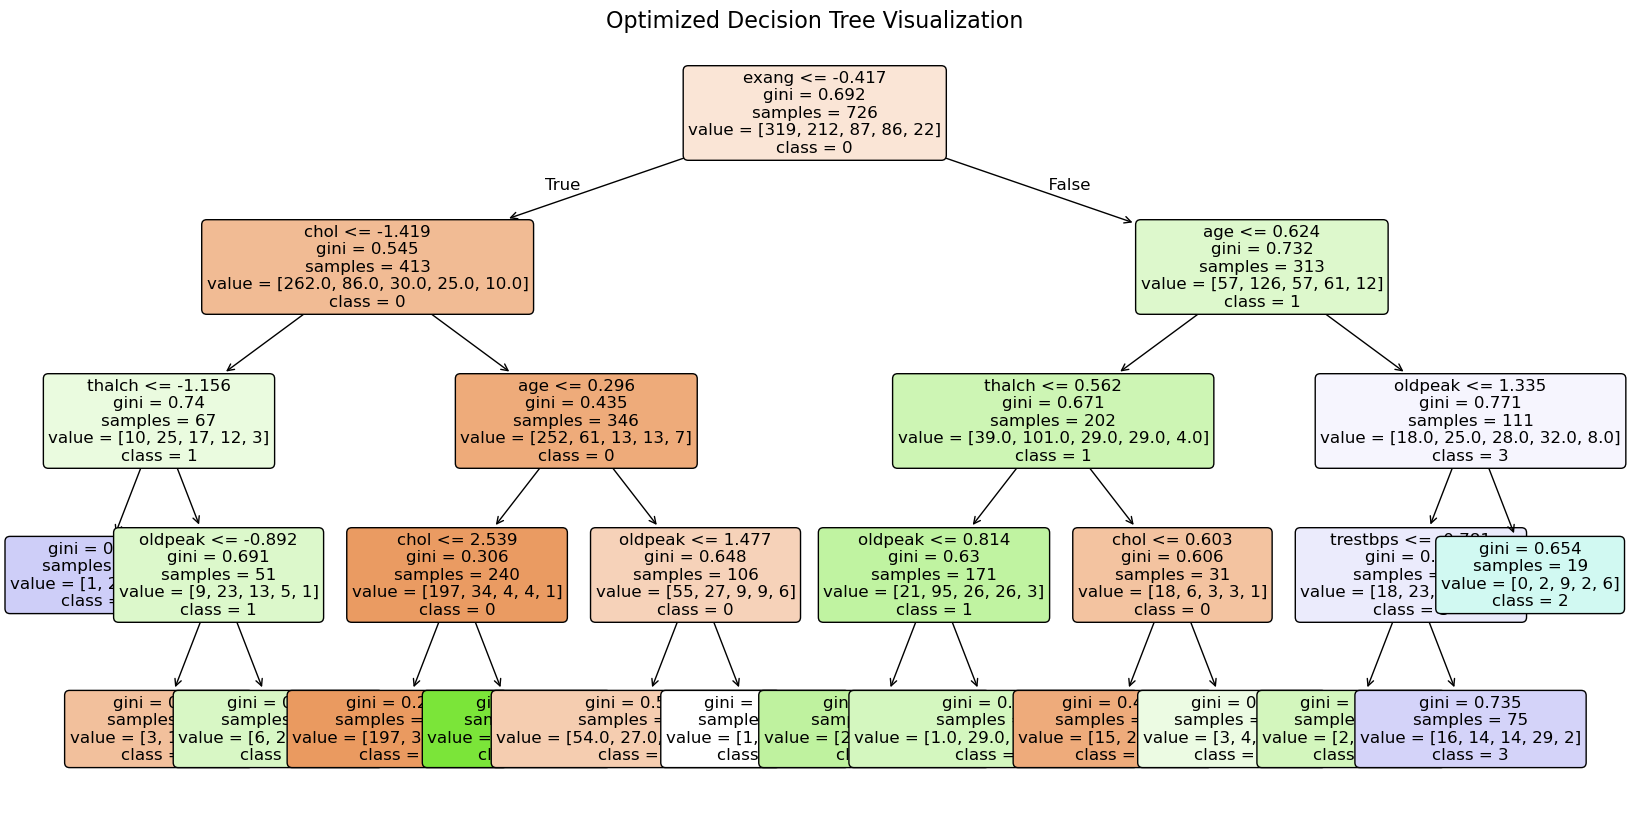


--- Feature Importances ---


,Feature,Importance
4,exang,0.392086
2,chol,0.240593
0,age,0.133717
5,oldpeak,0.108277
3,thalch,0.097740
1,trestbps,0.027586


In [57]:

plt.figure(figsize=(20,10))
plot_tree(
    best_dt_model,
    feature_names=X_scaled.columns,
    class_names=[str(cls) for cls in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Optimized Decision Tree Visualization", fontsize=16)
plt.show()
feature_importance = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Feature Importances ---")
display(feature_importance)


In [58]:
#Model Evalution and Analysis

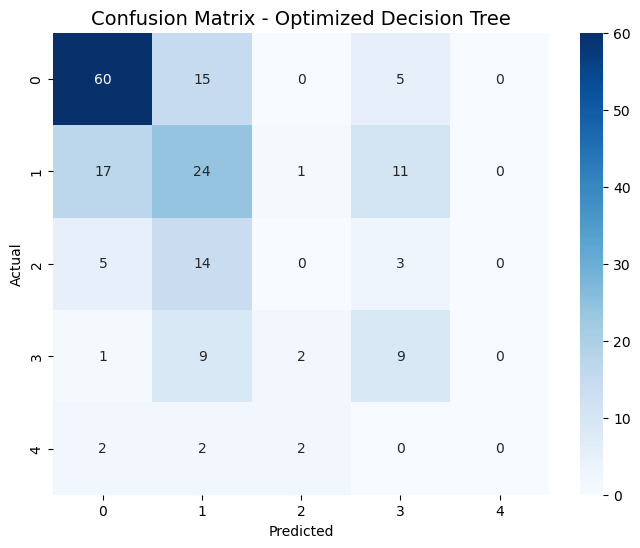

In [60]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_best_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Optimized Decision Tree", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [63]:
print("\n--- Classification Report ---")
report = classification_report(y_test, y_best_pred, zero_division=0)
print(report)


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        80
           1       0.38      0.45      0.41        53
           2       0.00      0.00      0.00        22
           3       0.32      0.43      0.37        21
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.28      0.33      0.30       182
weighted avg       0.46      0.51      0.48       182



In [64]:
feature_importance = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Feature Importance Analysis ---")
display(feature_importance)


--- Feature Importance Analysis ---


,Feature,Importance
4,exang,0.392086
2,chol,0.240593
0,age,0.133717
5,oldpeak,0.108277
3,thalch,0.097740
1,trestbps,0.027586


In [66]:
print("1. Features with higher importance contributed most to the model predictions.")
print("2. Confusion matrix shows how many samples were correctly or incorrectly classified.")
print("3. Classification report metrics (precision, recall, F1-score) indicate overall model performance.")
print("4. Accuracy, weighted precision, recall, and F1-score provide a summary of model effectiveness.")

1. Features with higher importance contributed most to the model predictions.
2. Confusion matrix shows how many samples were correctly or incorrectly classified.
3. Classification report metrics (precision, recall, F1-score) indicate overall model performance.
4. Accuracy, weighted precision, recall, and F1-score provide a summary of model effectiveness.


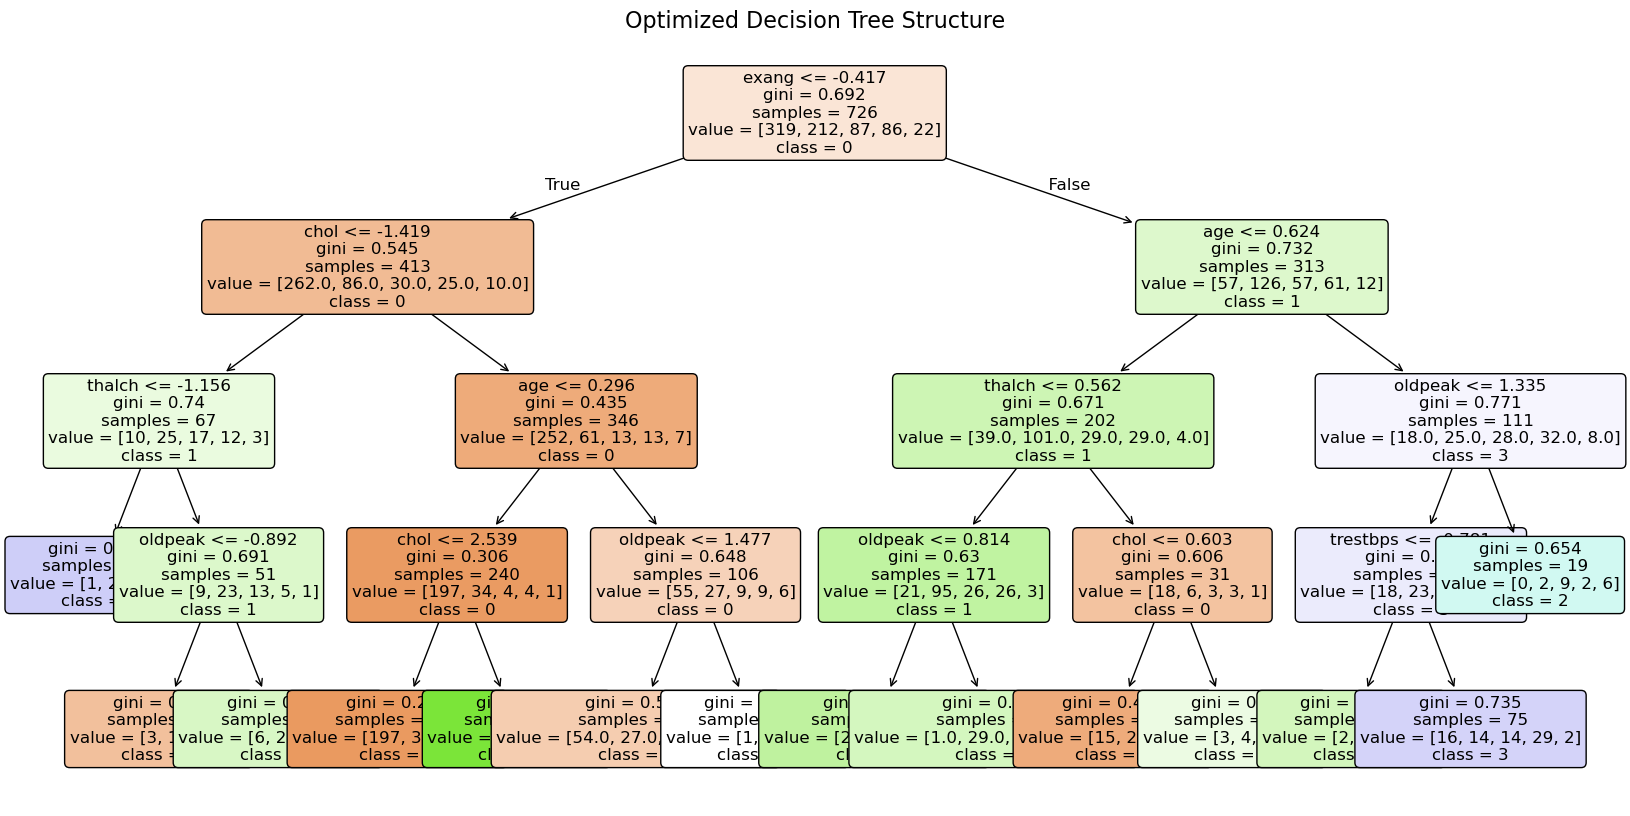

In [67]:
plt.figure(figsize=(20,10))
plot_tree(
    best_dt_model,
    feature_names=X_scaled.columns,                   # feature names
    class_names=[str(cls) for cls in sorted(y.unique())],  # class labels
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Optimized Decision Tree Structure", fontsize=16)
plt.show()


In [68]:
feature_importance = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Feature Importance ---")
display(feature_importance)


--- Feature Importance ---


,Feature,Importance
4,exang,0.392086
2,chol,0.240593
0,age,0.133717
5,oldpeak,0.108277
3,thalch,0.097740
1,trestbps,0.027586


In [69]:
#interview Questions

In [70]:
1.#Common Hyperparameters of Decision Tree Models:

#1.max_depth
#Limits how deep the tree can grow.
#Shallow tree → may underfit (too simple).
#Deep tree → may overfit (too complex).

#2.min_samples_split
#Minimum number of samples required to split a node.
#Higher value → fewer splits → simpler tree → less overfitting.
#Lower value → more splits → complex tree → may overfit.

#3.min_samples_leaf
#Minimum samples required at a leaf node.
#Helps smooth predictions and prevent overfitting.
#criterion

#4.Measures quality of a split. Common options:
#"gini" → Gini impurity
#"entropy" → Information gain
#Affects how splits are chosen.

#5.max_features
#Number of features considered when looking for the best split.
#Can reduce overfitting and speed up training.

In [ ]:
2.#Label Encoding
#Converts categorical values into numeric labels.

#One-Hot Encoding
#Converts categorical values into binary columns (0 or 1).